In [497]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [498]:
#import data
group_files = sorted(glob.glob ("./Comp Vision Project/Group JPEGs_Uncropped/IMG_*.jpg"))
group_pics=[]
group_pics_cp=[]
group_pics_gray = []
for myFile in group_files:
    pic = cv2.imread(myFile)
    pic = cv2.resize(pic,(800,600))
    pic =cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    group_pics.append(pic.copy())
    group_pics_cp.append(pic.copy())
#     plt.imshow(pic)
#     plt.show()
    pic =cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    group_pics_gray.append(pic.copy())
    
    

In [499]:
#detect faces
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
identified_faces = []
for i, img in enumerate(group_pics_gray):
    identified_faces.append(
        faceCascade.detectMultiScale(img, scaleFactor=1.35, minNeighbors=5, 
                                     minSize=(30, 30), flags = cv2.CASCADE_SCALE_IMAGE)
    )


In [500]:
# draw a rectangle around the faces
for i, faces in enumerate(identified_faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(group_pics[i], (x, y), (x+w, y+h), (255, 0, 0),thickness=3)


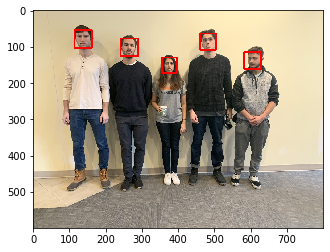

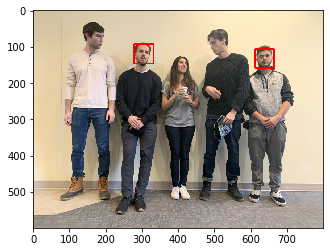

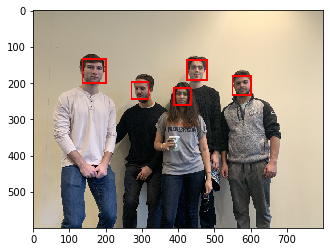

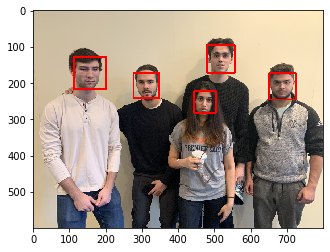

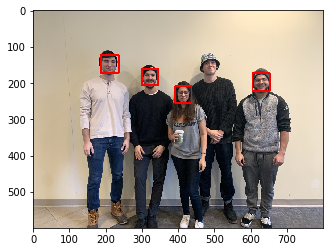

In [501]:
#print images with detected faces
for pic in group_pics:
    plt.imshow(pic)
    plt.show()

In [502]:
#exctract faces from group images
faces_id = []
group_pics_gray = np.asarray(group_pics_gray)
for i in range(len(group_pics)):
    for j in range(len(identified_faces[i])):
#         print(identified_faces[i].shape)
        x,y,w,h = identified_faces[i][j]
        faces_id.append(cv2.resize(group_pics_gray[i,y:y+h,x:x+w],(100,100)))
    

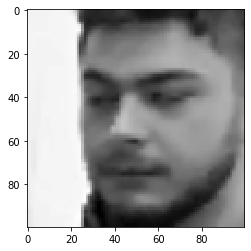

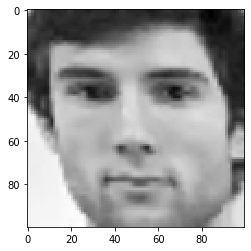

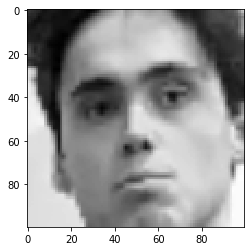

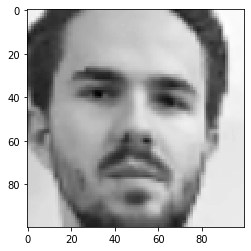

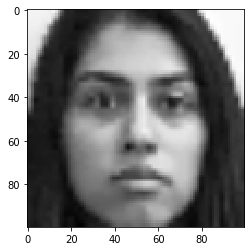

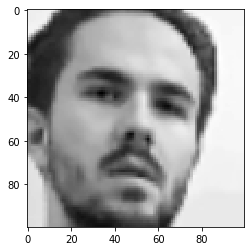

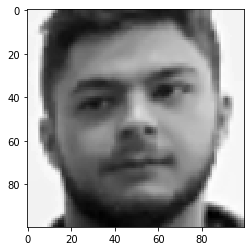

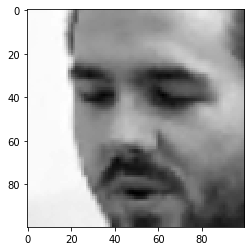

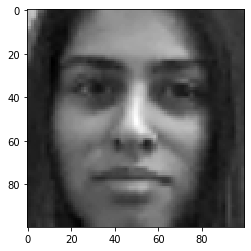

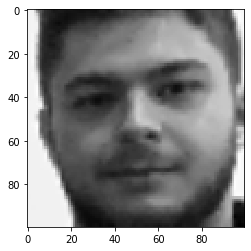

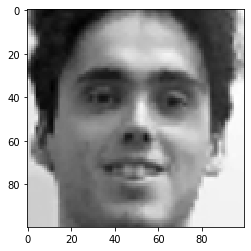

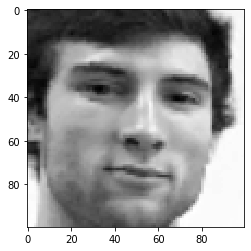

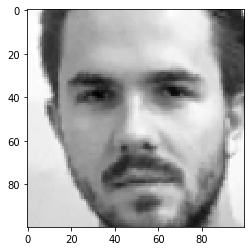

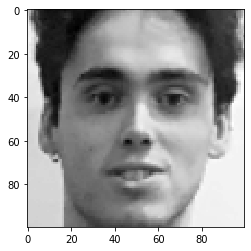

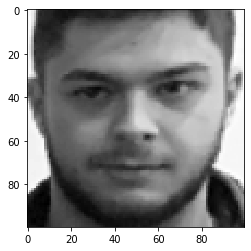

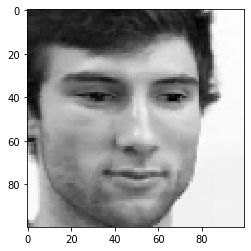

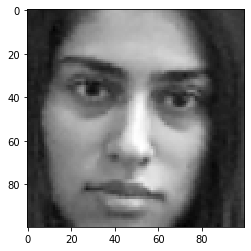

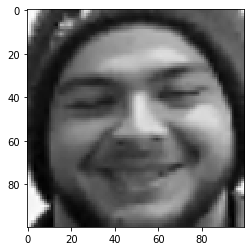

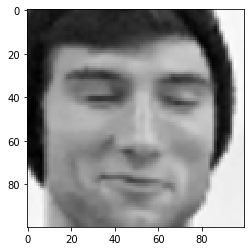

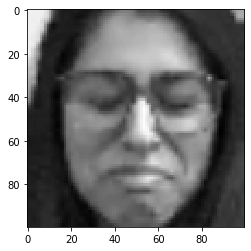

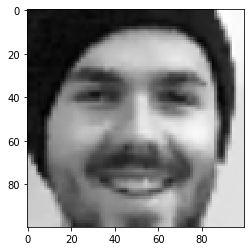

In [503]:
#print recovered faces
for face in faces_id:
    plt.imshow(face,cmap='gray')
    plt.show()

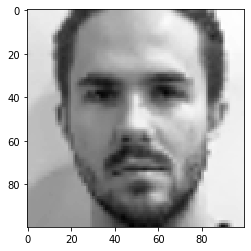

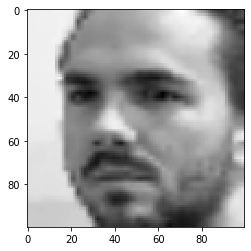

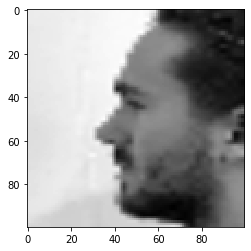

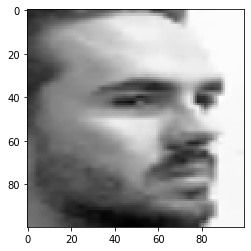

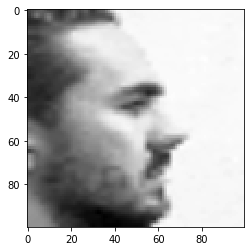

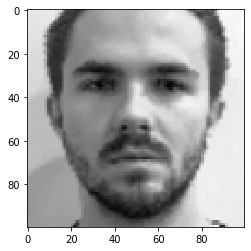

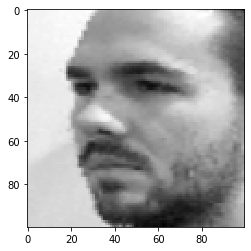

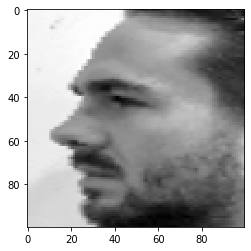

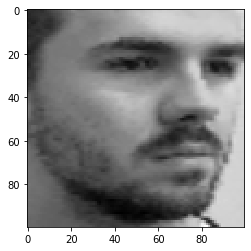

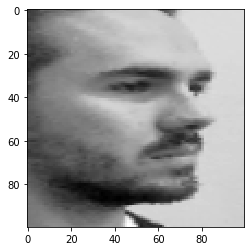

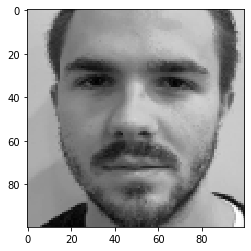

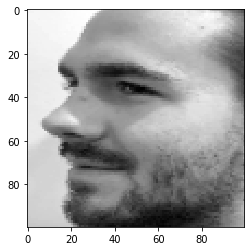

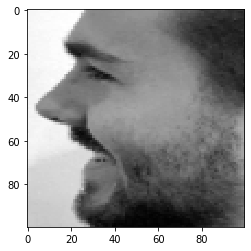

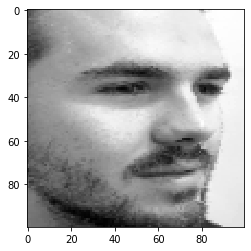

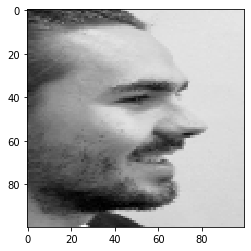

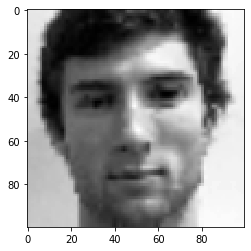

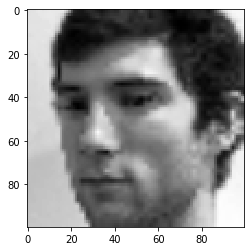

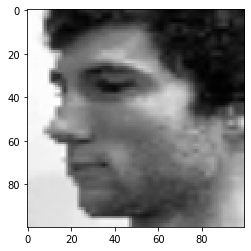

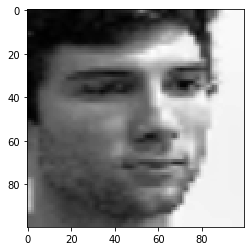

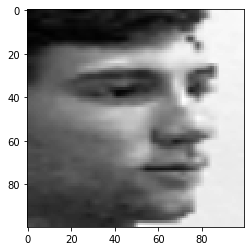

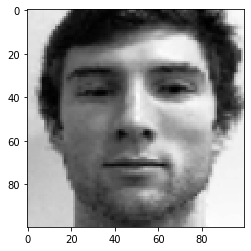

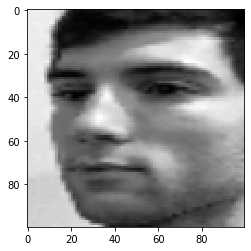

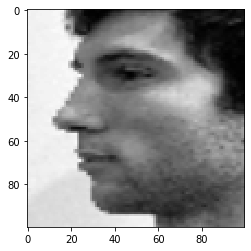

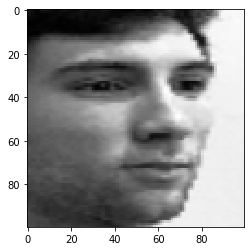

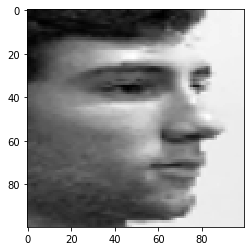

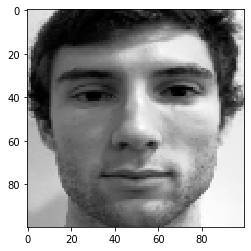

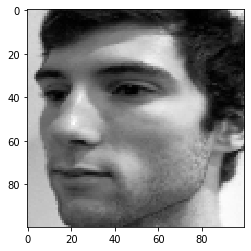

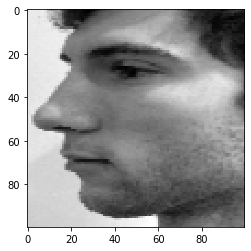

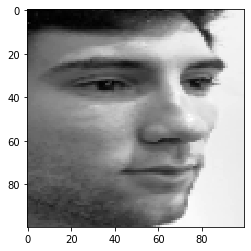

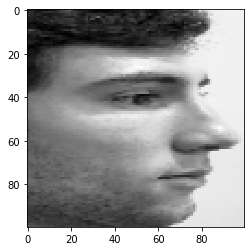

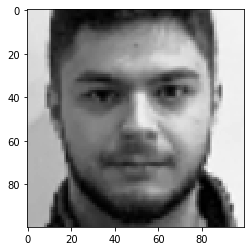

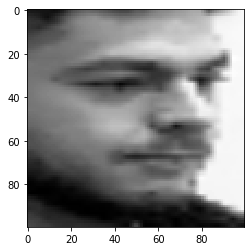

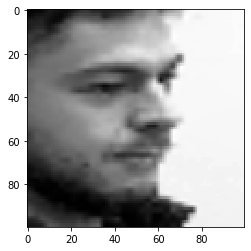

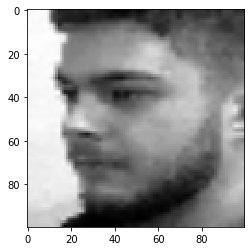

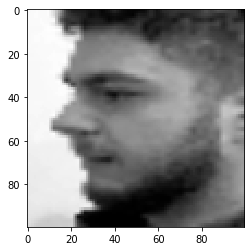

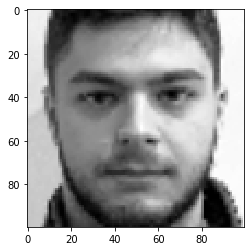

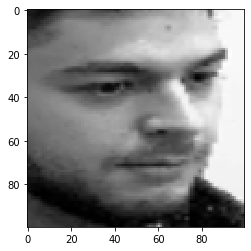

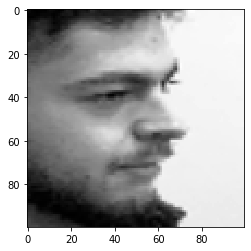

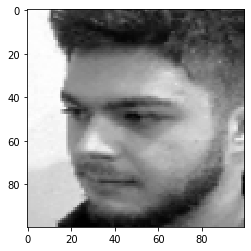

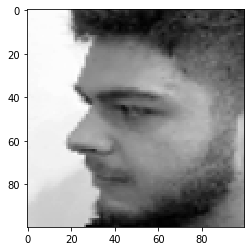

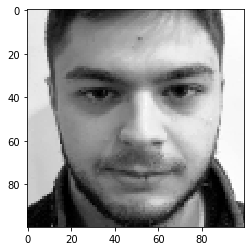

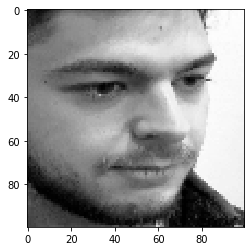

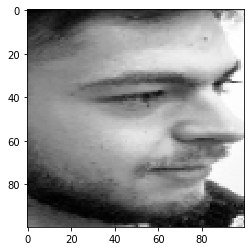

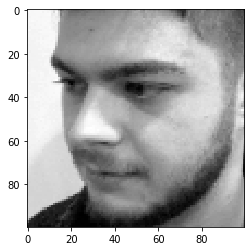

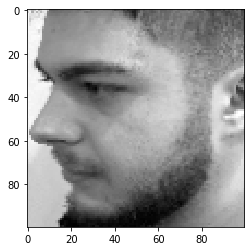

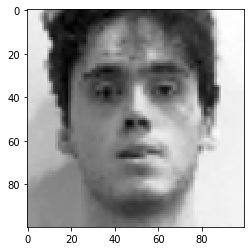

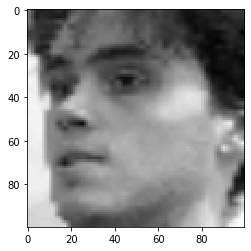

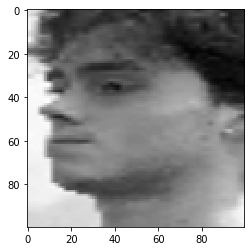

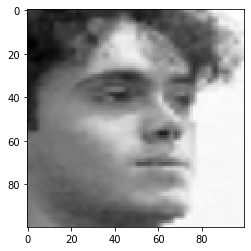

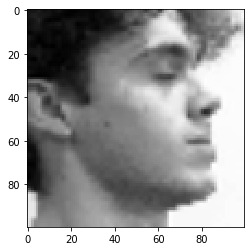

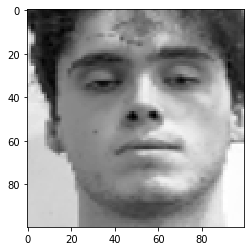

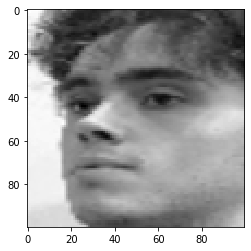

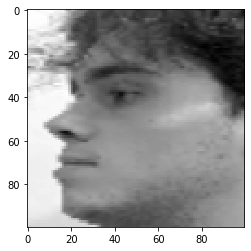

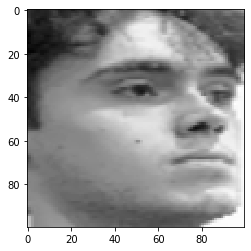

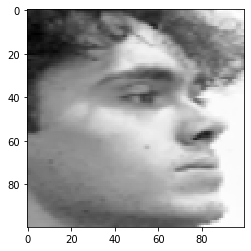

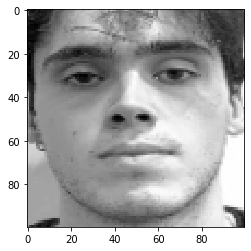

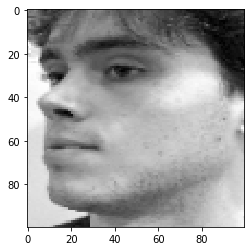

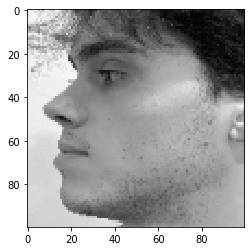

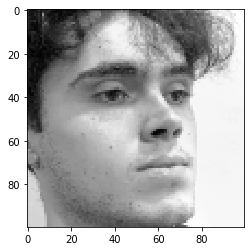

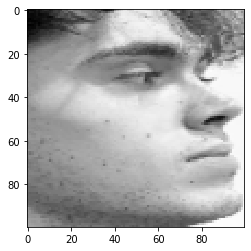

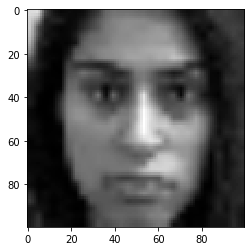

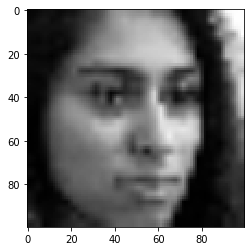

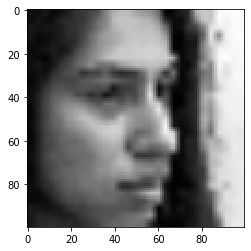

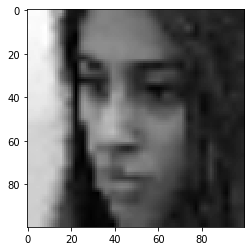

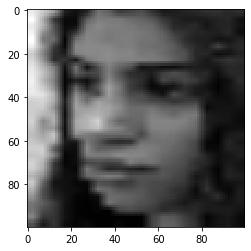

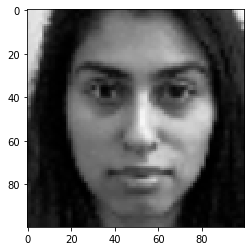

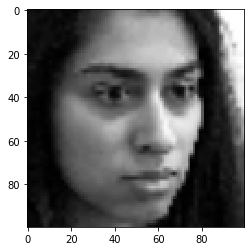

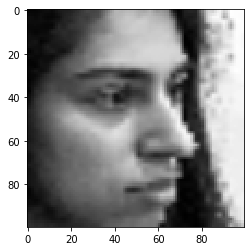

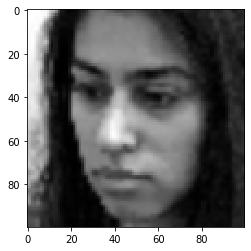

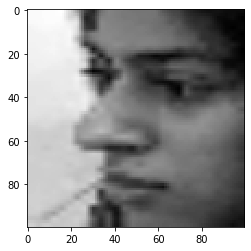

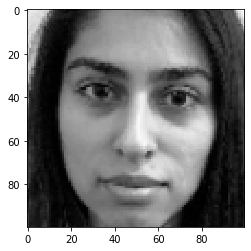

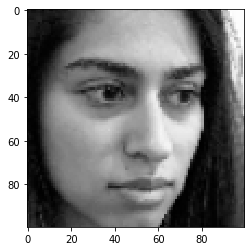

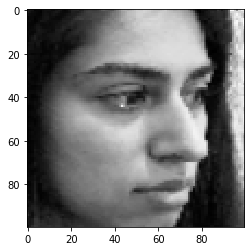

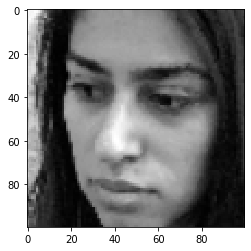

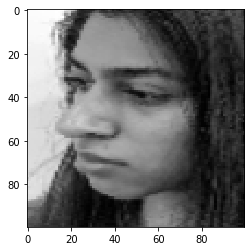

In [504]:
#this builds training set, redundant from previous parts...
quentin_train_ROI = [[98, 70, 51, 51], [100, 71, 36, 43], [90, 75, 35, 50], [122, 73, 30, 48], [125, 75, 35, 50], [98, 60, 67, 75], [80, 62, 55, 73], [80, 55, 47, 78], [100, 75, 50, 68], [98, 62, 51, 90], [55, 70, 120, 133], [80, 72, 85, 125], [70, 90, 80, 120], [60, 67, 90, 127], [97, 54, 88, 156]]
connor_train_ROI = [[112, 94, 46, 46], [103, 98, 45, 45], [103, 103, 38, 47], [109, 96, 39, 49], [115, 104, 30, 47], [92, 80, 60, 65], [100, 77, 45, 67], [70, 83, 51, 67], [100, 80, 50, 70], [106, 81, 44, 69], [80, 60, 105, 122], [70, 63, 105, 125], [50, 80, 80, 120], [98, 75, 80, 118], [112, 59, 75, 131]]
bogdan_train_ROI = [[100, 105, 57, 57], [120, 111, 27, 42], [128, 106, 35, 44], [95, 102, 38, 46], [89, 105, 36, 50], [95, 96, 62, 62], [124, 104, 47, 65], [131, 99, 52, 67], [91, 87, 65, 80], [76, 91, 60, 75], [68, 72, 133, 140], [89, 80, 100, 125], [107, 78, 80, 130], [45, 84, 115, 120], [60, 89, 102, 110]]
julien_train_ROI = [[94, 79, 51, 51], [112, 89, 37, 43], [110, 90, 35, 60], [120, 85, 40, 50], [110, 90, 45, 50], [95, 87, 59, 70], [108, 80, 50, 75], [100, 77, 50, 77], [95, 75, 50, 75], [110, 75, 50, 75], [75, 75, 95, 120], [90, 75, 90, 125], [75, 75, 100, 125], [77, 56, 127, 140], [100, 75, 80, 125]]
sarah_train_ROI = [[113, 103, 29, 29], [107, 95, 30, 30], [114, 95, 29, 29], [97, 101, 29, 29], [105, 104, 20, 32], [96, 81, 54, 54], [104, 84, 51, 51], [116, 90, 38, 44], [81, 88, 50, 50], [83, 90, 28, 40], [68, 83, 89, 89], [77, 80, 84, 84], [93, 91, 70, 80], [74, 94, 77, 77], [58, 86, 70, 102]] 

single_imgs = sorted(glob.glob ("./Comp Vision Project/Cropped JPEGs/Train_Images/IMG_*.jpg"))
#print(single_imgs)
faces = []
ROIS = []
ROIS.append(quentin_train_ROI)
ROIS.append(connor_train_ROI)
ROIS.append(bogdan_train_ROI)
ROIS.append(julien_train_ROI)
ROIS.append(sarah_train_ROI)
ROIS = np.asarray(ROIS)
index  = -1
pics = []
for i, img in enumerate(single_imgs):
    pic = cv2.imread(img)
    pic =cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(pic,(256,256))
    pics.append(pic)
#     plt.imshow(pic,cmap='gray')
#     plt.show()
cropped = []
for i, pic in enumerate(pics):
    dims = ROIS[int(i/15),i%15]
    cropped.append(cv2.resize(pic[dims[1]:dims[1]+dims[3],dims[0]:dims[0]+dims[2]],(100,100)))
    #print(dims)
    plt.imshow(cropped[i],cmap='gray')
    plt.show()

In [505]:
#create our labels
Y_train = np.concatenate((['Quentin' for x in range(15)], ['Connor' for x in range(15)], ['Bogdan' for x in range(15)], ['Julien' for x in range(15)], ['Sarah'for x in range(15)]))

In [506]:
#fit our PCA with 70 components
X_train =[]
print(np.asarray(X_train).shape)
for img in cropped:
    X_train.append(img.flatten())
print(np.asarray(X_train).shape)
    
component_number = 70 # optimized - check report for further details

pca = PCA(n_components=component_number)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)



(0,)
(75, 10000)


In [507]:
#create and transform our test set
X_test =[]
print(np.asarray(X_test).shape)
for img in faces_id:
    X_test.append(img.flatten())
print(np.asarray(X_test).shape)
X_test_pca = pca.transform(X_test)

(0,)
(21, 10000)


In [508]:
#recover predictions
y_pred = []
for i, _ in enumerate(X_test_pca):
    # Getting the index of the closest eigen face from the training set
    index = np.argmin(np.linalg.norm(X_test_pca[i] - X_train_pca, axis=1))
    y_pred.append(Y_train[index])

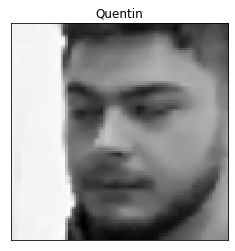

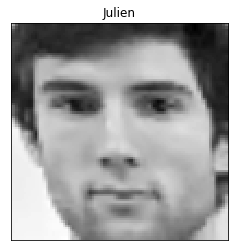

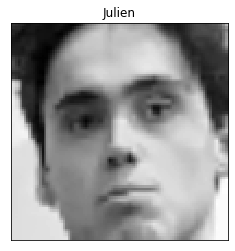

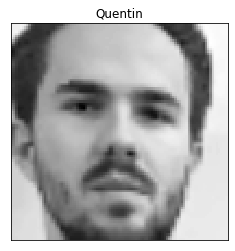

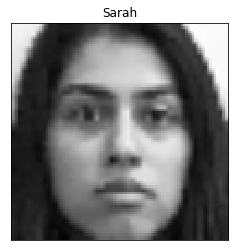

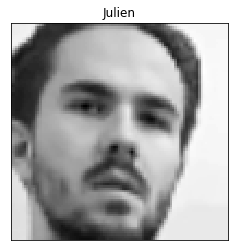

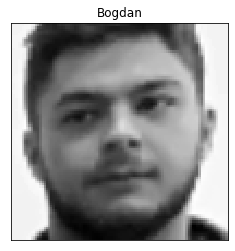

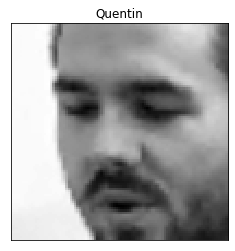

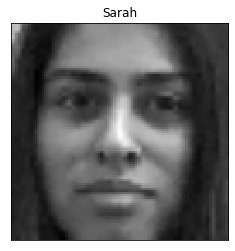

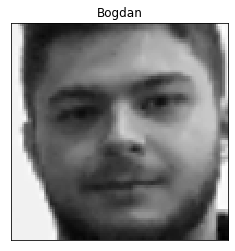

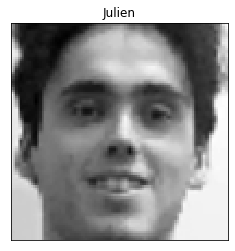

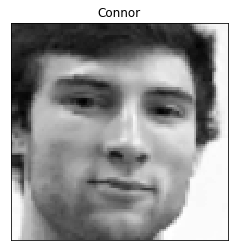

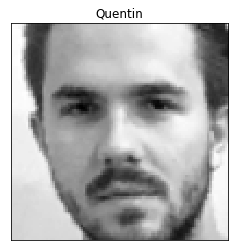

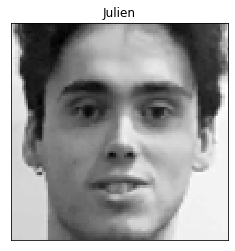

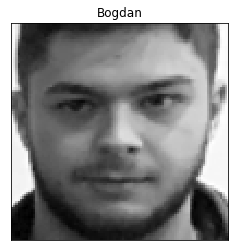

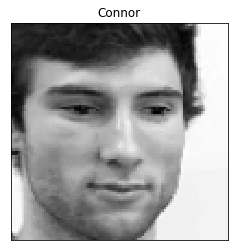

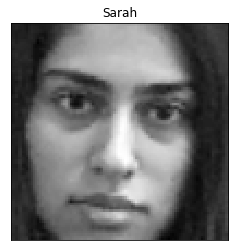

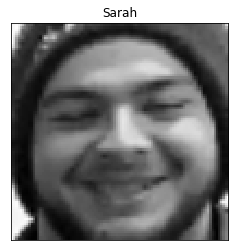

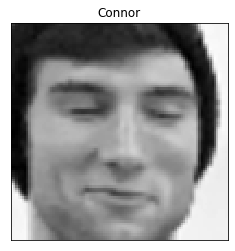

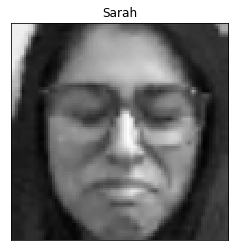

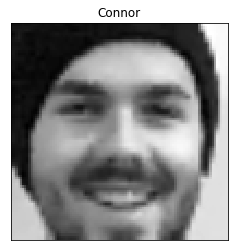

In [509]:
#print out labeled faces
for i,face in enumerate(faces_id):
    plt.imshow(face,cmap='gray')
    plt.title(y_pred[i]), plt.xticks([]), plt.yticks([])
    plt.show()

In [510]:
#add our labels to group images
index = 0
for i, faces in enumerate(identified_faces):
    for (x, y, w, h) in faces:
        cv2.putText(group_pics[i], y_pred[index], (x, y), 
                    cv2.FONT_ITALIC, 1, (255, 0, 0), 2, cv2.LINE_AA)
        index+=1

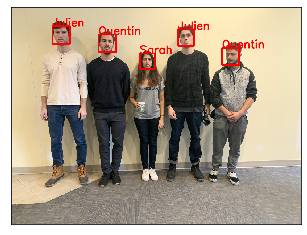

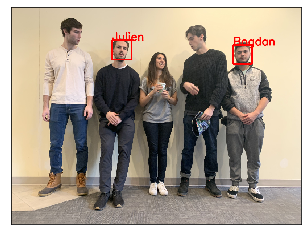

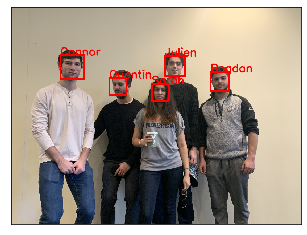

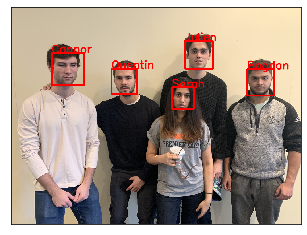

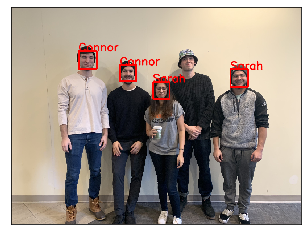

In [512]:
#print final labeled images ...
for pic in group_pics:
    plt.imshow(pic),plt.xticks([]), plt.yticks([])
    plt.show()